# * Topic: Deep Learning Practical Issues  ✨🎄

# ---------------------------------------------------------------------------

## Problem Statement:

##  Build an ANN model to predict Delivery Status for a logistic firm. (Refer fedex dataset)

## -----------------------------------------------------------------------------------

### Problem Objective:
#### The main objective of data set is to predict Delivery Status for a logistic firm using a simple ANN model.

## import libraries:

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os
import theano
import keras
import tensorflow
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## import dataset:

In [3]:
df = pd.read_csv(r"G:\360digit\AI&DL\Assignments\6. Deep learning Practical issues\fedex.csv")
df.head()

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,2008,1,3,4,2003.0,1955,2225,WN,335,150.0,8.0,IAD,TPA,810,0.0
1,2008,1,3,4,754.0,735,1000,WN,3231,145.0,19.0,IAD,TPA,810,1.0
2,2008,1,3,4,628.0,620,750,WN,448,90.0,8.0,IND,BWI,515,0.0
3,2008,1,3,4,926.0,930,1100,WN,1746,90.0,-4.0,IND,BWI,515,0.0
4,2008,1,3,4,1829.0,1755,1925,WN,3920,90.0,34.0,IND,BWI,515,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3604175 entries, 0 to 3604174
Data columns (total 15 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Year                   int64  
 1   Month                  int64  
 2   DayofMonth             int64  
 3   DayOfWeek              int64  
 4   Actual_Shipment_Time   float64
 5   Planned_Shipment_Time  int64  
 6   Planned_Delivery_Time  int64  
 7   Carrier_Name           object 
 8   Carrier_Num            int64  
 9   Planned_TimeofTravel   float64
 10  Shipment_Delay         float64
 11  Source                 object 
 12  Destination            object 
 13  Distance               int64  
 14  Delivery_Status        float64
dtypes: float64(4), int64(8), object(3)
memory usage: 412.5+ MB


In [5]:
df.describe(include="all")

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
count,3604175.0,3.604175e+06,3.604175e+06,3.604175e+06,3.522573e+06,3.604175e+06,3.604175e+06,3604175,3.604175e+06,3.603628e+06,3.522573e+06,3604175,3604175,3.604175e+06,3.522573e+06
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,297,299,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WN,NaN,NaN,NaN,ATL,ATL,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,602447,NaN,NaN,NaN,207003,206935,NaN,NaN
mean,2008.0,3.514942e+00,1.568481e+01,3.934604e+00,1.338455e+03,1.329371e+03,1.495305e+03,NaN,2.223795e+03,1.291603e+02,1.115893e+01,NaN,NaN,7.280915e+02,2.038890e-01
std,0.0,1.709912e+00,8.763332e+00,1.987126e+00,4.814053e+02,4.664365e+02,4.854825e+02,NaN,1.944583e+03,6.951011e+01,3.618888e+01,NaN,NaN,5.611318e+02,4.028875e-01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,NaN,1.000000e+00,-2.500000e+01,-9.200000e+01,NaN,NaN,1.100000e+01,0.000000e+00
25%,2008.0,2.000000e+00,8.000000e+00,2.000000e+00,9.290000e+02,9.250000e+02,1.115000e+03,NaN,6.160000e+02,8.000000e+01,-4.000000e+00,NaN,NaN,3.250000e+02,0.000000e+00
50%,2008.0,4.000000e+00,1.600000e+01,4.000000e+00,1.329000e+03,1.321000e+03,1.519000e+03,NaN,1.573000e+03,1.110000e+02,-1.000000e+00,NaN,NaN,5.830000e+02,0.000000e+00
75%,2008.0,5.000000e+00,2.300000e+01,6.000000e+00,1.733000e+03,1.720000e+03,1.910000e+03,NaN,3.602000e+03,1.600000e+02,1.000000e+01,NaN,NaN,9.570000e+02,0.000000e+00


In [6]:
df = df.drop(["Year"], axis=1) # removing year column

In [7]:
df1 = df.dropna() #removing NA rows

In [8]:
df1.head()

,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,1,3,4,2003.0,1955,2225,WN,335,150.0,8.0,IAD,TPA,810,0.0
1,1,3,4,754.0,735,1000,WN,3231,145.0,19.0,IAD,TPA,810,1.0
2,1,3,4,628.0,620,750,WN,448,90.0,8.0,IND,BWI,515,0.0
3,1,3,4,926.0,930,1100,WN,1746,90.0,-4.0,IND,BWI,515,0.0
4,1,3,4,1829.0,1755,1925,WN,3920,90.0,34.0,IND,BWI,515,1.0


In [9]:
df1.shape

(3522167, 14)

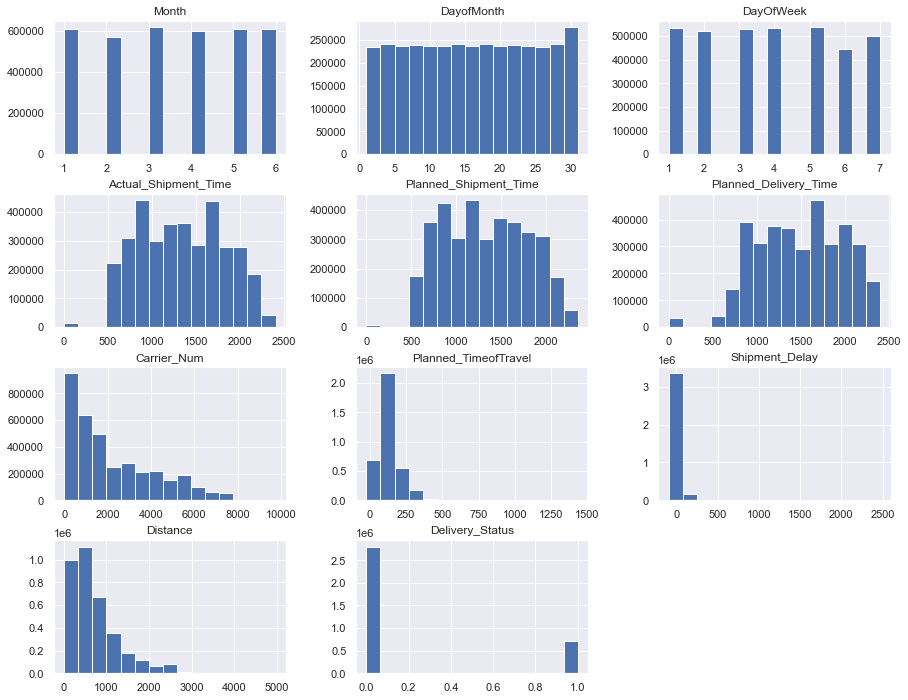

In [10]:
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

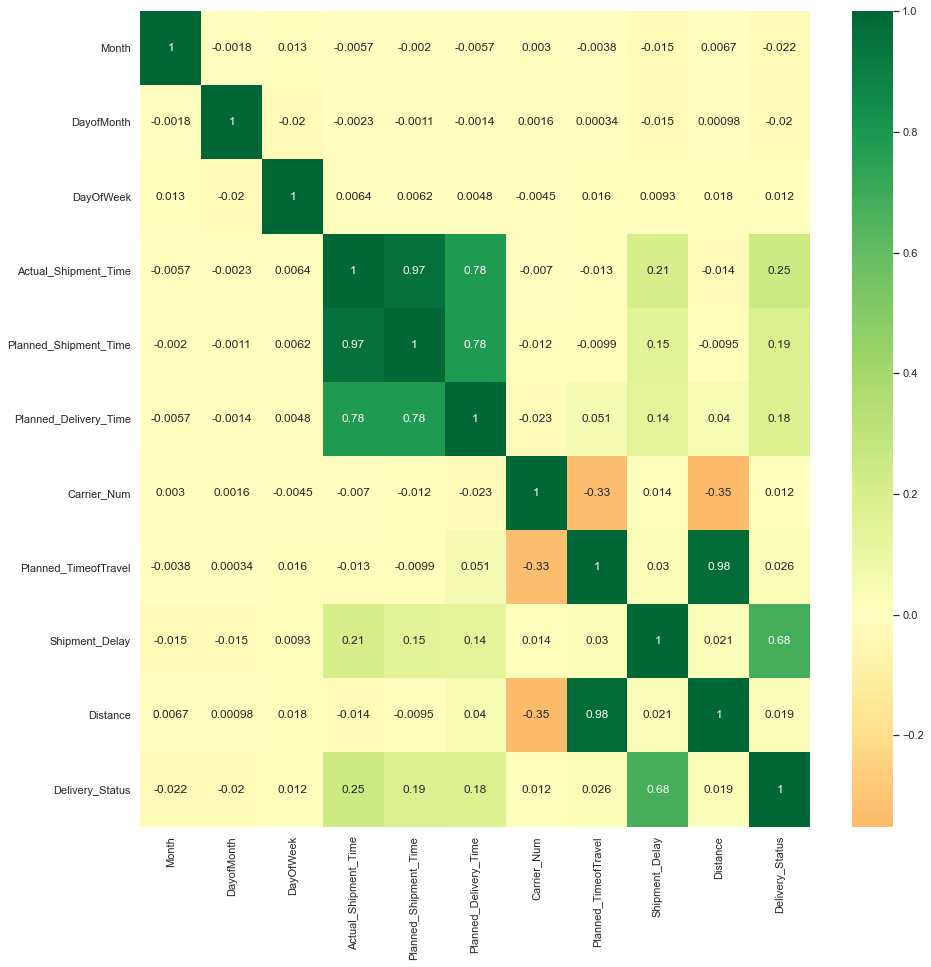

In [11]:
plt.figure(figsize=(15,15))
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',center=0)

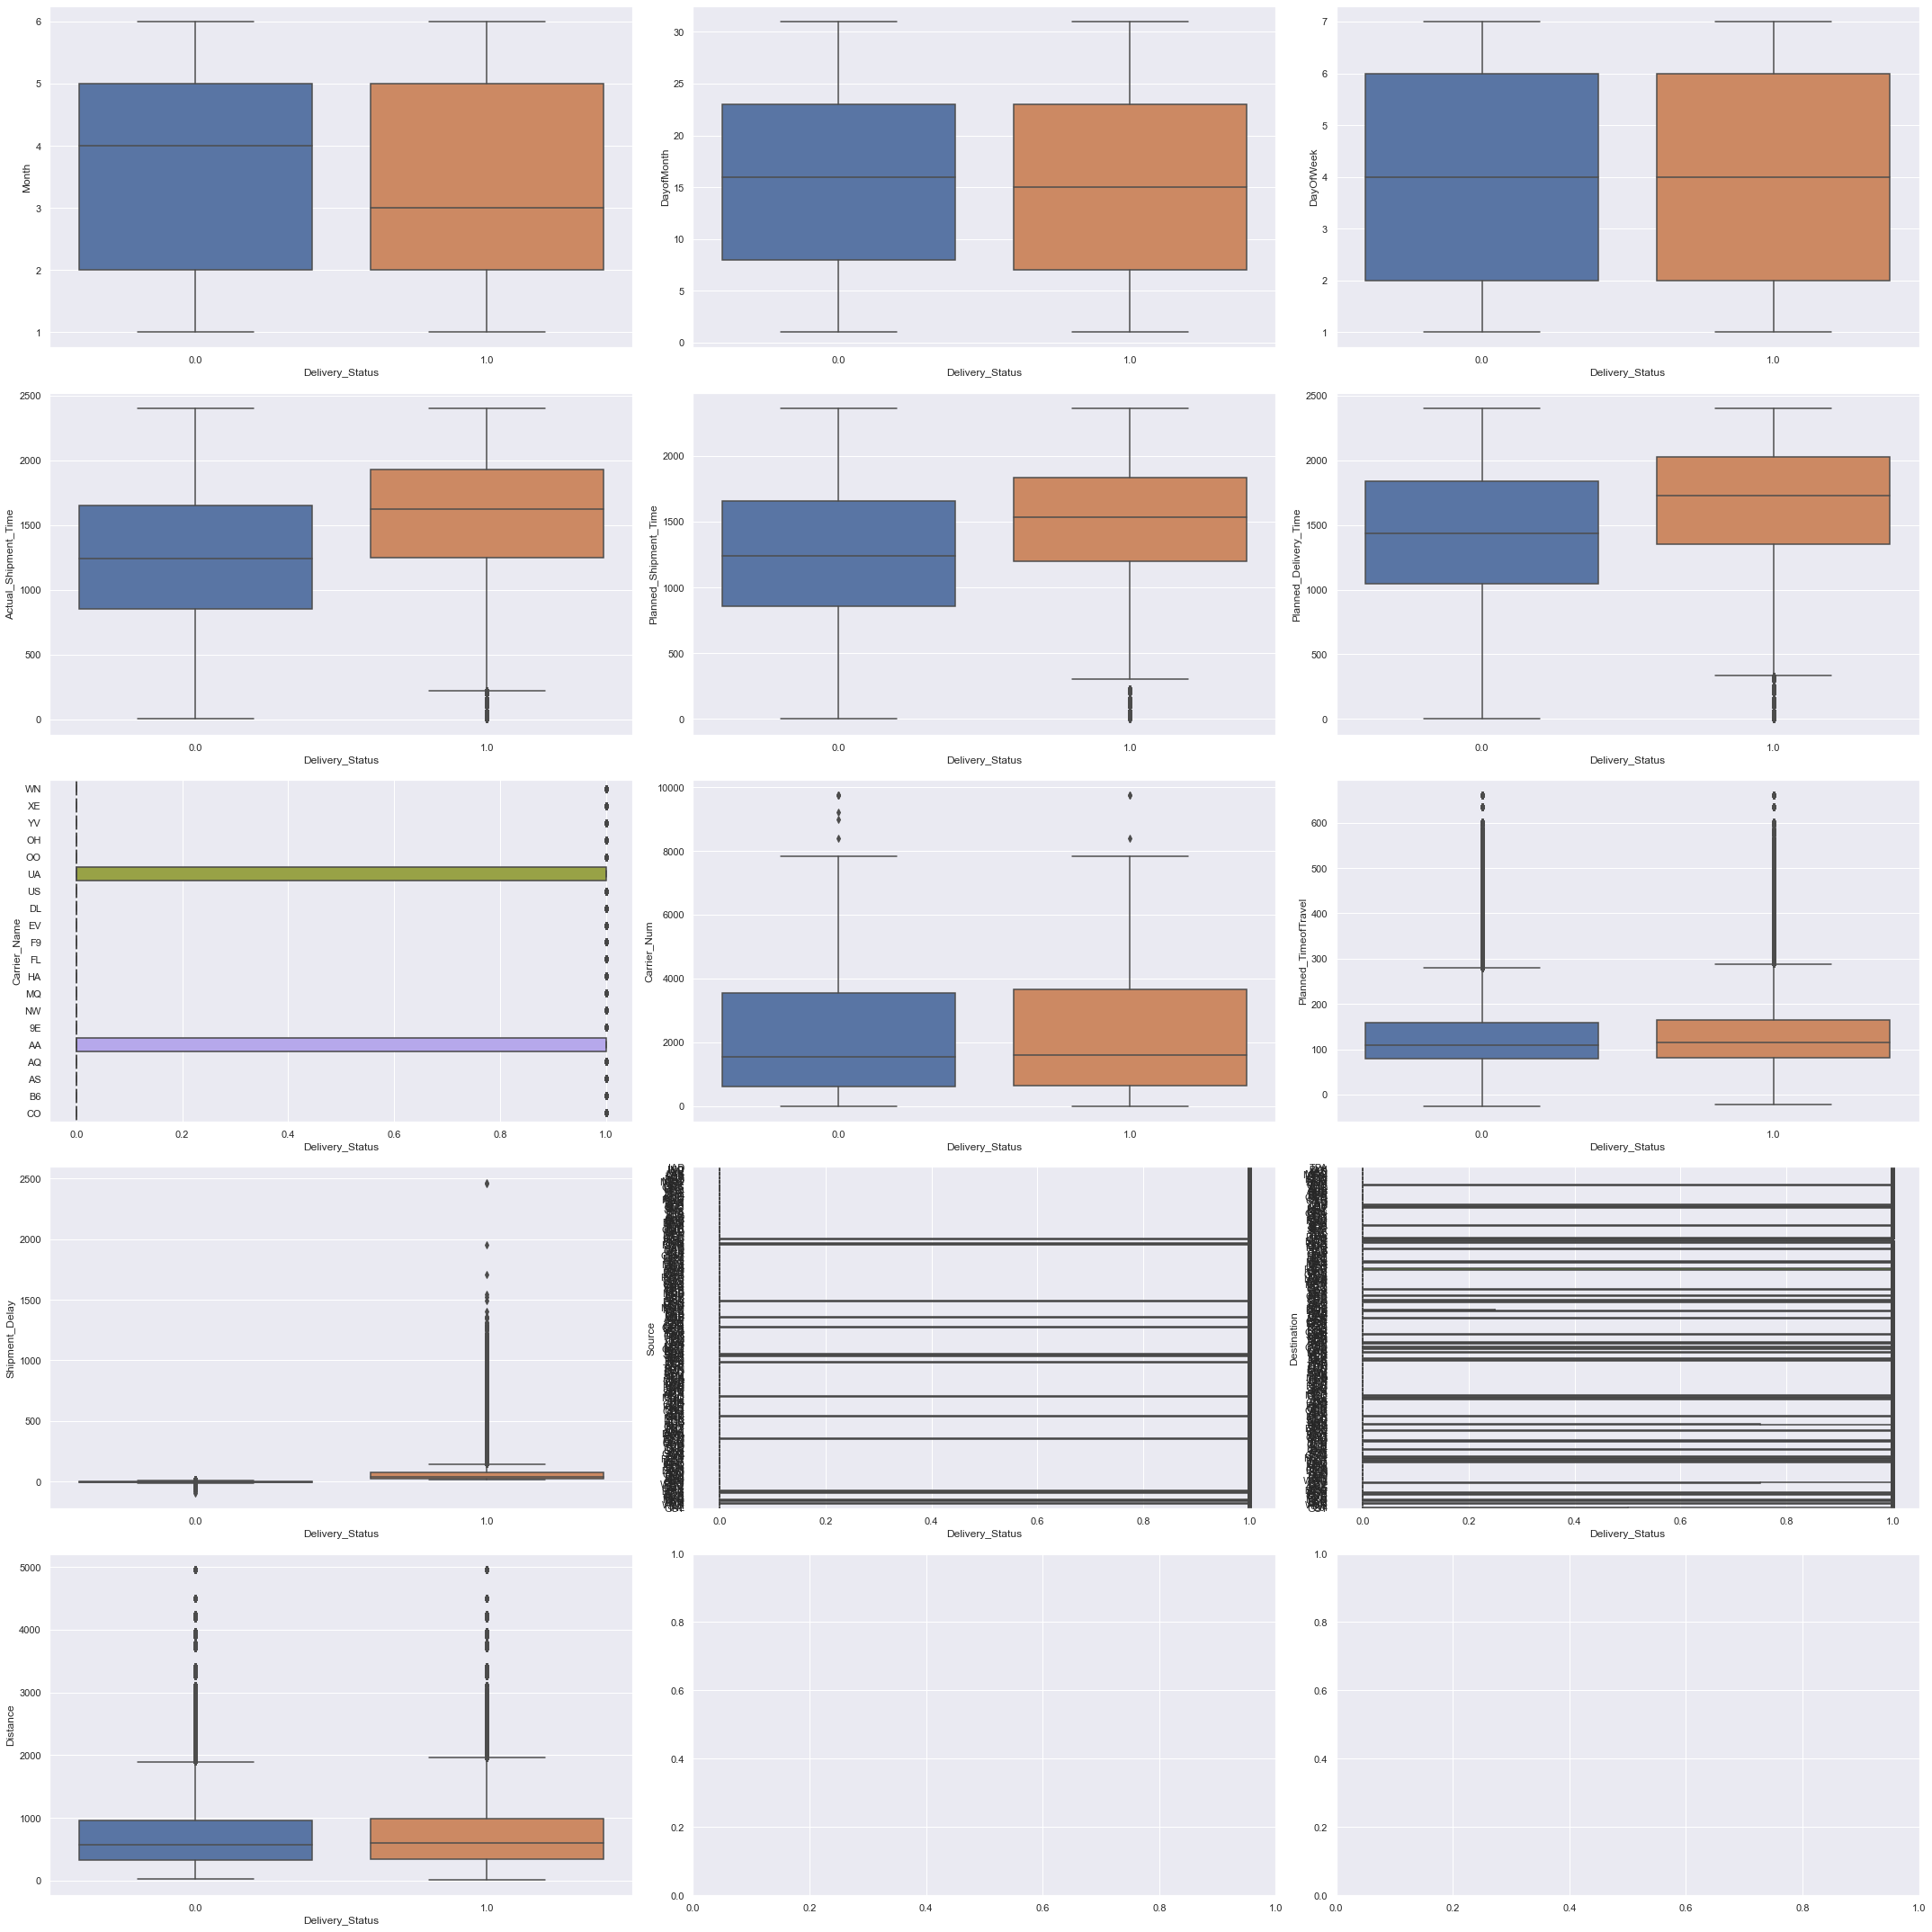

In [12]:
fig,ax = plt.subplots(nrows = 5, ncols=3, figsize=(30,30))
row = 0
col = 0
for i in range(len(df.columns) -1):
    if col > 2:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = df['Delivery_Status'], y = df[df.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
# plt.title("Individual Features by Class")
plt.show()

### Label Encoding:

In [13]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df1["Carrier_Name"] = enc.fit_transform(df1["Carrier_Name"])
df1["Source"] = enc.fit_transform(df1["Source"])
df1["Destination"] = enc.fit_transform(df1["Destination"])
df1.head()

C:\Users\Hp\anaconda3\envs\DL\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,1,3,4,2003.0,1955,2225,17,335,150.0,8.0,134,281,810,0.0
1,1,3,4,754.0,735,1000,17,3231,145.0,19.0,134,281,810,1.0
2,1,3,4,628.0,620,750,17,448,90.0,8.0,139,48,515,0.0
3,1,3,4,926.0,930,1100,17,1746,90.0,-4.0,139,48,515,0.0
4,1,3,4,1829.0,1755,1925,17,3920,90.0,34.0,139,48,515,1.0


In [14]:
df1 = df1.astype(int)

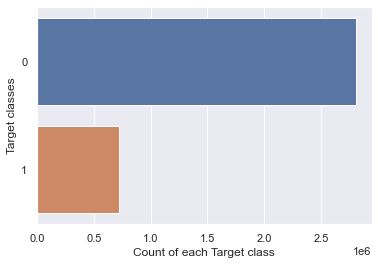

In [15]:
sns.countplot(y=df1.Delivery_Status ,data=df1)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

In [16]:
df1.head()

,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,1,3,4,2003,1955,2225,17,335,150,8,134,281,810,0
1,1,3,4,754,735,1000,17,3231,145,19,134,281,810,1
2,1,3,4,628,620,750,17,448,90,8,139,48,515,0
3,1,3,4,926,930,1100,17,1746,90,-4,139,48,515,0
4,1,3,4,1829,1755,1925,17,3920,90,34,139,48,515,1


### Choosing X and y:

In [17]:
X = df1.drop('Delivery_Status',axis = 1)
y = df1['Delivery_Status']

In [18]:
X.shape

(3522167, 13)

In [19]:
y

0          0
1          1
2          0
3          0
4          1
          ..
3604170    0
3604171    0
3604172    0
3604173    0
3604174    1
Name: Delivery_Status, Length: 3522167, dtype: int32

### Train/Test data split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
X_train[:5]

array([[ 0.86159019,  0.94707013,  1.03564865, -1.00635791, -0.91770795,
        -0.8960576 ,  0.14306229, -0.39435528, -0.15056581, -0.47429529,
         1.01684195, -0.75632544, -0.20885473],
       [ 0.27656261, -0.87947533, -0.97571244, -0.49116391, -0.47618868,
        -0.53979955,  0.48390575,  0.91594354, -0.62359816, -0.41907177,
         1.44869245, -0.23992146, -0.58526881],
       [ 0.86159019,  1.28954741, -0.97571244,  0.66179042,  0.4647189 ,
         0.94907081,  1.16559268,  0.46781928,  0.86717047,  1.67942217,
         0.72470778, -0.64296847,  0.71264957],
       [-0.89349255, -1.10779351, -0.47287216,  0.79058892,  0.84622585,
         0.72872623, -1.39073329, -0.94934789, -0.63793247, -0.41907177,
         0.82631966,  1.47302834, -0.44855238],
       [ 0.86159019, -1.3361117 ,  1.53848892,  1.46158757,  1.53636763,
         1.57097793,  1.16559268,  0.35527194,  0.8958391 , -0.39146   ,
        -1.09160464,  1.23371918,  0.90440769]])

In [39]:
X_train.shape

(2465516, 13)

## Model:

In [54]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(units = 20, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))
model.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'tanh'))

In [55]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Fitting the ANN to the Training set

In [56]:
history = model.fit(X_train, y_train, epochs = 25, batch_size = 100, verbose=1)

Epoch 1/25
24656/24656 [==============================] - 49s 2ms/step - loss: 0.0146 - accuracy: 0.9957
Epoch 2/25
24656/24656 [==============================] - 51s 2ms/step - loss: 0.0032 - accuracy: 0.9994
Epoch 3/25
24656/24656 [==============================] - 56s 2ms/step - loss: 0.0019 - accuracy: 0.9997
Epoch 4/25
24656/24656 [==============================] - 59s 2ms/step - loss: 0.0018 - accuracy: 0.9997
Epoch 5/25
24656/24656 [==============================] - 59s 2ms/step - loss: 0.0014 - accuracy: 0.9998 0s -
Epoch 6/25
24656/24656 [==============================] - 57s 2ms/step - loss: 0.0012 - accuracy: 0.9998
Epoch 7/25
24656/24656 [==============================] - 54s 2ms/step - loss: 0.0019 - accuracy: 0.9997
Epoch 8/25
24656/24656 [==============================] - 53s 2ms/step - loss: 0.0025 - accuracy: 0.9996 1s - loss: 0.0026 - ac - ETA:  - ETA: 0s - loss: 0.002
Epoch 9/25
24656/24656 [==============================] - 54s 2ms/step - loss: 0.0010 - accuracy: 0.

In [45]:
score, acc = model.evaluate(X_train, y_train, batch_size=100)
print('Train score:', score)
print('Train accuracy:', acc)

24656/24656 [==============================] - 18s 734us/step - loss: 7.4265e-06 - accuracy: 1.0000s
Train score: 7.426509910146706e-06
Train accuracy: 0.9999991655349731


### predictions and evaluating the model:

In [46]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [47]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [48]:
print('*'*20)
score, acc = model.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

********************
105666/105666 [==============================] - 73s 687us/step - loss: 7.6600e-06 - accuracy: 1.0000
Test score: 7.659995389985852e-06
Test accuracy: 1.0


## Evaluation Metrics:

### Confusion Matrix:

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Text(0.5, 12.5, 'Predicted label')

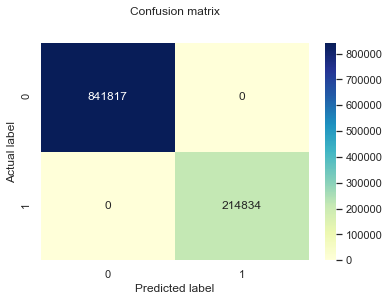

In [50]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [51]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    841817
           1       1.00      1.00      1.00    214834

    accuracy                           1.00   1056651
   macro avg       1.00      1.00      1.00   1056651
weighted avg       1.00      1.00      1.00   1056651



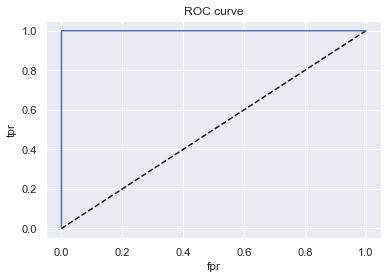

In [52]:
from sklearn.metrics import roc_curve
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [53]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

1.0